# Importing libraries 

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import zipfile
import numpy as np

# Loading Dataset through Kaggle API

In [3]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0




  0%|          | 0.00/25.6k [00:00<?, ?B/s]
100%|██████████| 25.6k/25.6k [00:00<00:00, 196kB/s]
100%|██████████| 25.6k/25.6k [00:00<00:00, 196kB/s]


In [47]:
df=pd.read_csv("red-wine-quality-cortez-et-al-2009.zip")

# Data Exploration and Analysis

In [48]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [57]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_std
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [63]:
df['quality'].quantile(.95)

7.0

Since wine quality ranking "7" belong to 95% percentile.In-order to standardize the quality column we will introduce 1 & 0 i.e., quality>=7=1 & quality<7=0

In [64]:
df['quality_std']=df['quality'].apply(lambda x: 1 if x>=7 else 0)
df['quality_std'].value_counts()

quality_std
0    1382
1     217
Name: count, dtype: int64

Identifying Identifying Skewness of the data

In [111]:
df.hist(column=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_std'],figsize=[100,100])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'quality_std'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

#The columns "pH" & 'density' are normally distributted and remaining columns indicate skewness


In [115]:
backup=df.copy()
backup.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_std
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Feature Engineering

In [112]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_std'],
      dtype='object')

In [122]:
qlty=df['quality_std'].copy()
qlty.value_counts()

quality_std
0    1382
1     217
Name: count, dtype: int64

In [120]:
features=df.drop(columns=['quality', 'quality_std'])
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [123]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [127]:
features.select_dtypes('float')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [131]:
import scipy.stats as stats
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))

In [132]:
pd.options.display.float_format = '{:.2f}'.format

In [133]:
feat1.agg(["mean", "std"])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Splitting the Data into Train and Test Set

In [135]:
test_size=.2

In [137]:
X_test = features.sample(frac = test_size, random_state= 123)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
912,10.00,0.46,0.44,2.90,0.07,4.00,8.00,1.00,3.33,0.62,12.20
772,9.50,0.57,0.27,2.30,0.08,23.00,144.00,1.00,3.27,0.55,9.40
1037,7.30,0.91,0.10,1.80,0.07,20.00,56.00,1.00,3.35,0.56,9.20
1106,8.20,0.23,0.42,1.90,0.07,9.00,17.00,0.99,3.21,0.54,12.30
263,7.90,0.37,0.23,1.80,0.08,23.00,49.00,1.00,3.28,0.67,9.30
...,...,...,...,...,...,...,...,...,...,...,...
698,9.40,0.61,0.28,3.20,0.09,18.00,72.00,1.00,3.31,0.53,9.70
1303,8.00,0.28,0.44,1.80,0.08,28.00,68.00,1.00,3.36,0.66,11.20
1530,6.60,0.44,0.09,2.20,0.06,9.00,18.00,0.99,3.42,0.69,11.30
1188,6.70,0.64,0.23,2.10,0.08,11.00,119.00,1.00,3.36,0.70,10.90


In [138]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [139]:
X_train = X_train.sample(frac = 1, random_state= 123)

In [141]:
y_train = qlty.loc[X_train.index]
y_test = qlty.loc[X_test.index]

# Training the ML Model (Random Forest Regressor)

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                   max_features= "sqrt", max_depth= 75, min_samples_split=2)

In [144]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [145]:
forest_reg.score(X_train, y_train)

0.9225363888615957

In [146]:
from sklearn.metrics import mean_squared_error

In [147]:
pred = forest_reg.predict(X_train)
pred

array([0.088, 0.008, 0.004, ..., 0.008, 0.062, 0.652])

In [150]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.09518728504257482

# Evaluating the Model on the Test Set

In [151]:
forest_reg.score(X_test, y_test)

0.4503234782608695

In [152]:
pred = forest_reg.predict(X_test)
pred

array([0.524, 0.002, 0.004, 0.556, 0.026, 0.676, 0.152, 0.008, 0.01 ,
       0.084, 0.008, 0.69 , 0.014, 0.048, 0.028, 0.236, 0.002, 0.232,
       0.17 , 0.022, 0.254, 0.014, 0.678, 0.036, 0.022, 0.016, 0.65 ,
       0.108, 0.108, 0.198, 0.   , 0.662, 0.018, 0.002, 0.424, 0.   ,
       0.29 , 0.424, 0.002, 0.004, 0.074, 0.236, 0.034, 0.034, 0.038,
       0.002, 0.072, 0.008, 0.194, 0.014, 0.006, 0.506, 0.016, 0.806,
       0.014, 0.442, 0.   , 0.   , 0.024, 0.016, 0.008, 0.184, 0.112,
       0.052, 0.64 , 0.292, 0.368, 0.132, 0.1  , 0.064, 0.02 , 0.008,
       0.306, 0.224, 0.076, 0.026, 0.04 , 0.002, 0.034, 0.17 , 0.014,
       0.054, 0.658, 0.022, 0.002, 0.024, 0.044, 0.016, 0.01 , 0.016,
       0.04 , 0.024, 0.03 , 0.384, 0.462, 0.026, 0.772, 0.37 , 0.226,
       0.028, 0.616, 0.612, 0.004, 0.048, 0.02 , 0.01 , 0.02 , 0.328,
       0.104, 0.204, 0.072, 0.314, 0.002, 0.092, 0.296, 0.47 , 0.054,
       0.006, 0.012, 0.002, 0.076, 0.366, 0.026, 0.01 , 0.024, 0.002,
       0.914, 0.008,

In [153]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.25531979946725636

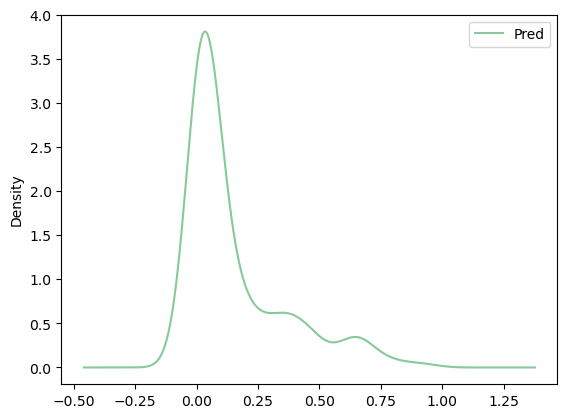

In [154]:
comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp.plot(kind='density',x="True_V",y="Pred", color = '#88c999')
plt.show()

In [197]:
comp

,True_V,Pred
912,0,0.52
772,0,0.00
1037,0,0.00
1106,0,0.56
263,0,0.03
...,...,...
698,0,0.00
1303,0,0.21
1530,0,0.29
1188,0,0.01


In [181]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

912    0.52
772    0.00
1037   0.00
1106   0.56
263    0.03
       ... 
698    0.00
1303   0.21
1530   0.29
1188   0.01
1589   0.00
Length: 320, dtype: float64

In [182]:
mae = ae.mean()
mae

0.152925

# Feature Importance

In [183]:
forest_reg.feature_importances_

array([0.07723171, 0.11353479, 0.09346121, 0.06551784, 0.07267087,
       0.06191594, 0.08904535, 0.09199549, 0.05992725, 0.1065707 ,
       0.16812885])

In [184]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)

In [185]:
feature_imp

alcohol                0.17
volatile acidity       0.11
sulphates              0.11
citric acid            0.09
density                0.09
total sulfur dioxide   0.09
fixed acidity          0.08
chlorides              0.07
residual sugar         0.07
free sulfur dioxide    0.06
pH                     0.06
dtype: float64

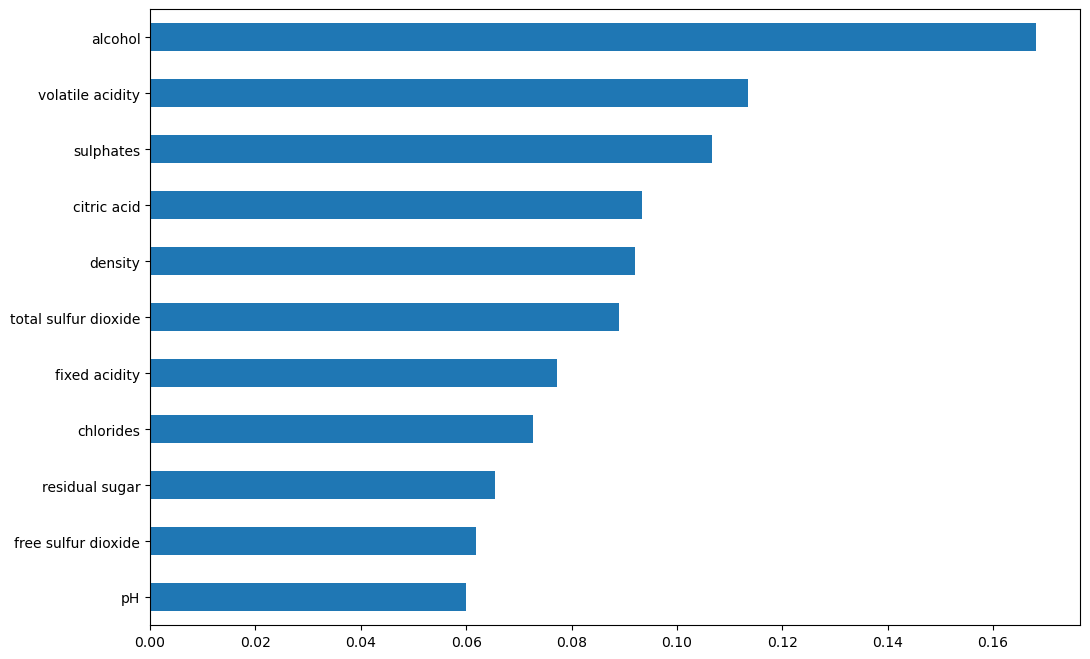

In [186]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()